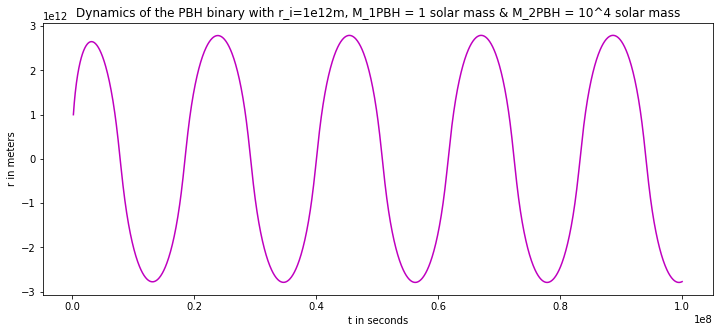

In [2]:
# Dynamics of the PBH binaries with PBHs of masses, M_1PBH & M_2PBH at an initial separation of r_i=1e12m
# M_1PBH = 1 solar mass &  M_2PBH = 100 solar mass.
# This binary is not having DM halos around the PBHs.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import math

π=3.14
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
M_PBH=1e32            # in kg


def f(u,t):
    return [u[1], (((-G*(M_1PBH+M_2PBH)*u[0])/((u[0]**2+b**2)**(3/2))) - (u[0]/(4*t**2)))]
                    # eq.(4) in reference "PBH-binary" pdf.
        
M_1PBH=1.989e30     # in  kg  
M_2PBH=1.989e34     # in kg
b= 1e12
r0= [1e12,2.12044e6]
ts= np.linspace(2.358e5,1e8,2000)
us= odeint(f,r0,ts)
rs= us[:,0]

plt.figure(figsize=(12,5))
plt.plot(ts,rs,'m')
plt.xlabel('t in seconds')
plt.ylabel('r in meters')
plt.title('Dynamics of the PBH binary with r_i=1e12m, M_1PBH = 1 solar mass & M_2PBH = 10^4 solar mass')
plt.savefig("1.jpg",dpi=100)
plt.show()


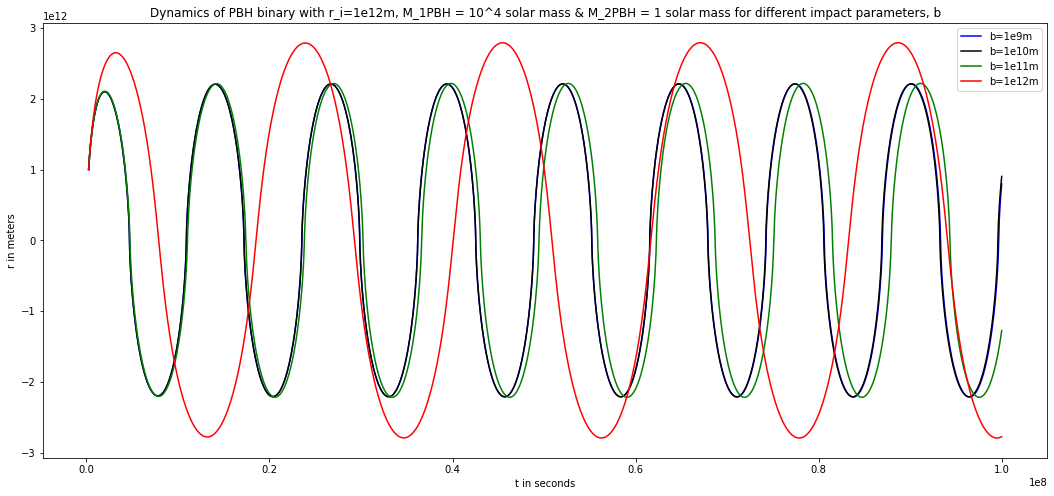

In [7]:
# Reference "PBH-binary" pdf.
# solution of eq.(4)  for different impact parameters and r_i=1e12m initial separation between the PBHs 
# in the binary (without DM halos).
 


M_1PBH=1.989e34             # in units of kg 
M_2PBH=1.989e30             # in units of kg 
                  
def f(u,w):
    return [u[1], (((-G*(M_1PBH+M_2PBH)*u[0])/((u[0]**2+b**2)**(3/2))) - (u[0]/(4*w**2)))]
b= 1e9
r0= [1e12,2.12044e6]
ws= np.linspace(2.358e5,1e8,3000)
us= odeint(f,r0,ws)
rs= us[:,0]

def j(n,p):
    return [n[1], (((-G*(M_1PBH+M_2PBH)*n[0])/((n[0]**2+e**2)**(3/2))) - (n[0]/(4*p**2)))]
e= 1e10
z0= [1e12,2.12044e6]
ps= np.linspace(2.358e5,1e8,2000)
ns= odeint(j,z0,ps)
zs= ns[:,0]

def g(v,t):
    return [v[1], (((-G*(M_1PBH+M_2PBH)*v[0])/((v[0]**2+c**2)**(3/2))) - (v[0]/(4*t**2)))]
c= 1e11
x0= [1e12,2.12044e6]
ts= np.linspace(2.358e5,1e8,2000)
vs= odeint(g,x0,ts)
xs= vs[:,0]


def h(m,k):
    return [m[1], (((-G*(M_1PBH+M_2PBH)*m[0])/((m[0]**2+d**2)**(3/2))) - (m[0]/(4*k**2)))]
d= 1e12
y0= [1e12,2.12044e6]
ks= np.linspace(2.358e5,1e8,2000)
ms= odeint(h,y0,ks)
ys= ms[:,0]





plt.figure(figsize=(18, 8))

plt.plot(ws,rs,'b')
plt.plot(ps,zs,'k')
plt.plot(ts,xs,'g')
plt.plot(ks,ys,'r')
plt.xlabel('t in seconds')
plt.ylabel('r in meters')  
plt.title('Dynamics of PBH binary with r_i=1e12m, M_1PBH = 10^4 solar mass & M_2PBH = 1 solar mass for different impact parameters, b')
plt.legend(["b=1e9m","b=1e10m","b=1e11m","b=1e12m"]) 
plt.savefig("2.jpg",dpi=100)
plt.show()

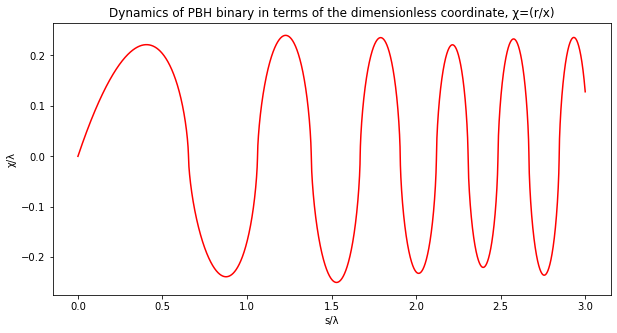

In [8]:
# Reference research paper "The merger rate of primordial-black-hole binaries".

# Dynamics of the PBH binaries in terms of the dimensionless coordinate, χ=(r/x).




def h(x):
    return math.sqrt((x**-3)+(x**-4))
def g(x):
        return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
    
    

def f(u,s):
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ
            *((u[0]**2+b**2)**(3/2))))] #Eq.(6) in "The merger rate of primordial-black-hole binaries" and 
                                        # eq.(20) in "PBH-binary" pdf.
λ=1
b=1e-6
separation0= [1e-12,1]
ss= np.linspace(1e-12,3,1000000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss/λ
Bs=separations/λ
plt.figure(figsize=(10,5))
plt.plot(As,Bs,'r')
plt.xlabel('s/λ')
plt.ylabel('χ/λ')
plt.title('Dynamics of PBH binary in terms of the dimensionless coordinate, χ=(r/x)')
plt.savefig("3.jpg",dpi=100)
plt.show()

b= 1.0e-06 χ/λ_0= 0.258
b= 1.0e-05 χ/λ_0= 0.235
b= 1.0e-04 χ/λ_0= 0.235
b= 1.0e-03 χ/λ_0= 0.243
b= 1.0e-02 χ/λ_0= 0.292


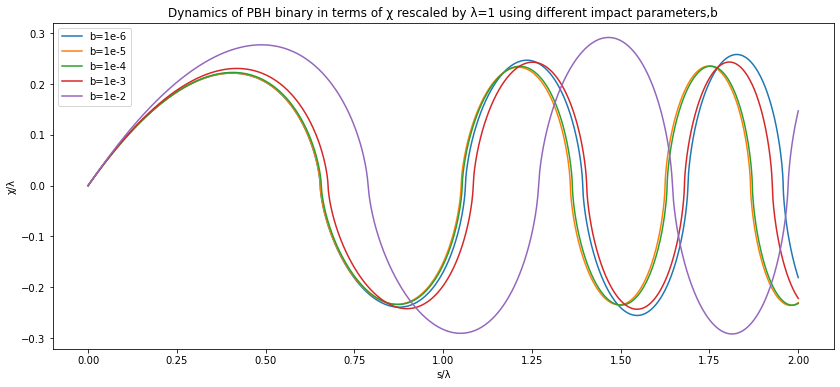

In [32]:
#Eq.(6) in "The merger rate of primordial-black-hole binaries" and eq.(20) in "PBH-binary" pdf.

# Dynamics of the PBH binaries in terms of the dimensionless coordinate, χ=(r/x) for different 
# impact parameters


fig = plt.figure(figsize=(14, 6))
def h(x):
    return math.sqrt((x**-3)+(x**-4))
def g(x):
        return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
    
b=1e-6    
while b<1e-1:
    def f(u,s):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*
                                                            λ*((u[0]**2+b**2)**(3/2))))]
    λ=1
    separation0= [1e-10,1]
    ss= np.linspace(1e-10,2,1000000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ
    Bs=separations/λ
    Bs_max=np.max(Bs)
    print("b=",'%.1e'%b,"χ/λ_0=",'%.3f'%Bs_max)
    plt.plot(As,Bs,'')
    b*=10

plt.xlabel('s/λ')
plt.ylabel('χ/λ')
plt.title('Dynamics of PBH binary in terms of χ rescaled by λ=1 using different impact parameters,b')
plt.legend(["b=1e-6","b=1e-5","b=1e-4","b=1e-3","b=1e-2"])
plt.savefig("4.jpg",dpi=100)
plt.show()

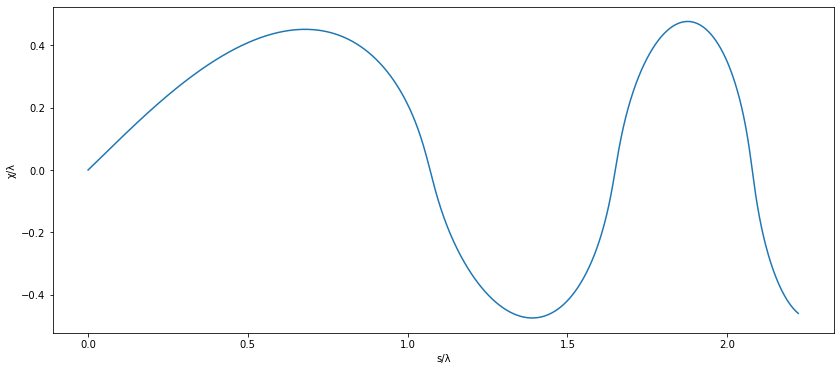

In [33]:
#Eq.(9) in "The merger rate of primordial-black-hole binaries" and eq.(32) in "PBH-binary" pdf.

# Dynamics of the PBH binaries in terms of the dimensionless coordinate, χ=(r/x) in radiation dominated era.


def f(u,s):
    return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ*((u[0]**2+b**2)**(3/2))))]
separation0= [1e-12,1]
λ=0.009
b=1e-3
ss= np.linspace(1e-12,2e-2,6000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss/λ
Bs=separations/λ
fig = plt.figure(figsize=(14, 6))
plt.plot(As,Bs,'')
plt.xlabel('s/λ')
plt.ylabel('χ/λ')
plt.show()

b= 1.0e-07 χ/λ= 0.208
b= 1.0e-06 χ/λ= 0.208
b= 1.0e-05 χ/λ= 0.215
b= 1.0e-04 χ/λ= 0.258


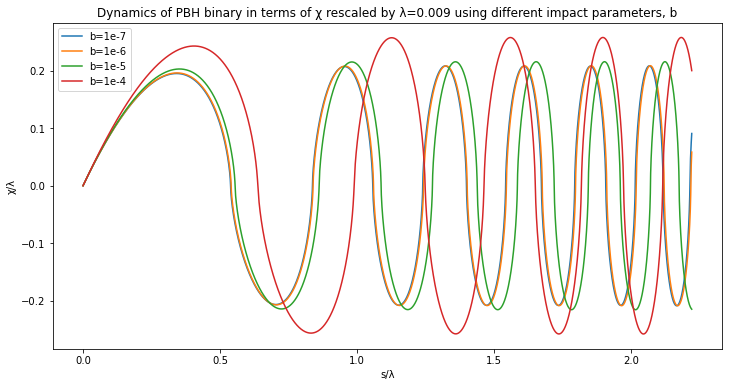

In [21]:
#Eq.(9) in "The merger rate of primordial-black-hole binaries" and eq.(32) in "PBH-binary" pdf.

# Dynamics of the PBH binaries in terms of the dimensionless coordinate, χ=(r/x) in radiation dominated era
# for different impact parameters.

fig= plt.figure(figsize=(12,6))
b=1e-7    
while b<1e-3:
    def f(u,s):
         return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ*((u[0]**2+b**2)**(3/2))))]
    separation0= [1e-12,1]
    λ=0.009
    ss= np.linspace(1e-12,2e-2,6000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ
    Bs=separations/λ
    Bs_max=np.max(Bs)
    print("b=",'%.1e'% b,"χ/λ=",'%.3f'%Bs_max)
    plt.plot(As,Bs,'')
    b*=10

plt.xlabel('s/λ')
plt.ylabel('χ/λ')
plt.title('Dynamics of PBH binary in terms of χ rescaled by λ=0.009 using different impact parameters, b')
plt.legend(["b=1e-7","b=1e-6","b=1e-5","b=1e-4"])
plt.savefig("5.jpg",dpi=100)
plt.show()

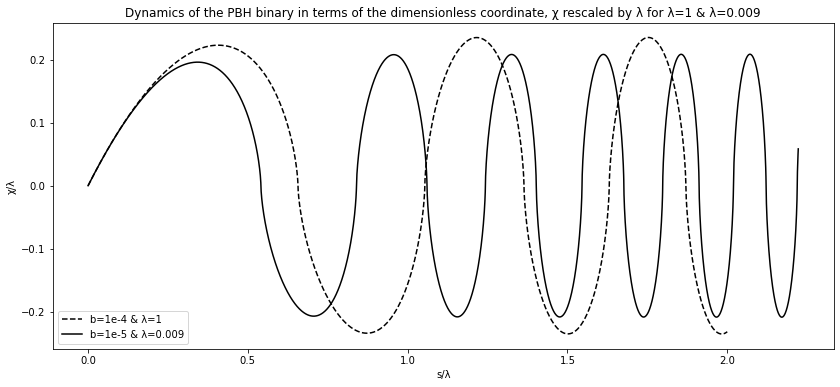

In [23]:
# Reproducing FIG. 1  of Reference paper "The merger rate of primordial-black-hole binaries".

def f(u,s):
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ*((u[0]**2+b**2)
                      #Eq.(6) in "The merger rate of primordial-black-hole binaries"                                                                     **(3/2))))]

λ=1
b=1e-4
separation0= [1e-10,1]
ss= np.linspace(1e-10,2,10000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss/λ
Bs=separations/λ


def j(n,p):
    return [n[1], ((p*n[1]-n[0])/(p**2))-((n[0]*(p**2))/(λ*((n[0]**2+c**2)**(3/2))))]
                   #Eq.(9) in "The merger rate of primordial-black-hole binaries"

z0= [1e-12,1]
λ=0.009
c=1e-6
ps= np.linspace(1e-12,2e-2,6000) 
ns= odeint(j,z0,ps)
zs= ns[:,0]
Ps=ps/λ
Zs=zs/λ



plt.figure(figsize=(14, 6))

plt.plot(As,Bs,'k--')
plt.plot(Ps,Zs,'k')

plt.xlabel('s/λ')
plt.ylabel('χ/λ')
labels = ["b=1e-4 & λ=1","b=1e-5 & λ=0.009"]
plt.legend(labels,loc="lower left")
plt.title('Dynamics of the PBH binary in terms of the dimensionless coordinate, χ rescaled by λ for λ=1 & λ=0.009') 
plt.savefig("6.jpg",dpi=100)
plt.show()

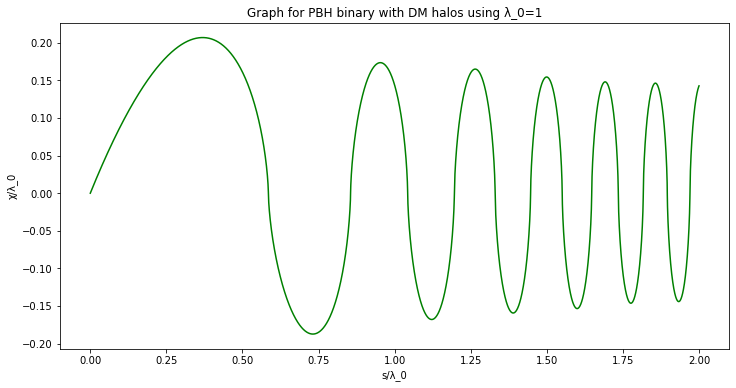

In [10]:
# Numerical solution for the evolution of an equal-mass PBH binary with a time-dependent DM halo. 
# Solution of eq.(20) in the pdf "PBH-binary". 
π=3.14
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kgm^-3
G=6.67e-11



def h(x):
    return math.sqrt((x**-3)+(x**-4))
def g(x):
        return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
    

def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))

def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)

def f(u,s):
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ(s)*((u[0]**2
                                                                                    +b**2)**(3/2))))]
λ_0=1
b=1e-6
separation0= [1e-12,1]
ss= np.linspace(1e-12,2,10000000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0

plt.figure(figsize=(12, 6))

plt.plot(As,Bs,'g')
plt.xlabel('s/λ_0')
plt.ylabel('χ/λ_0')
plt.title('Graph for PBH binary with DM halos using λ_0=1') 
plt.show()

b= 1.0e-07 χ/λ_0= 0.361
b= 1.0e-06 χ/λ_0= 0.207
b= 1.0e-05 χ/λ_0= 0.207
b= 1.0e-04 χ/λ_0= 0.208
b= 1.0e-03 χ/λ_0= 0.215


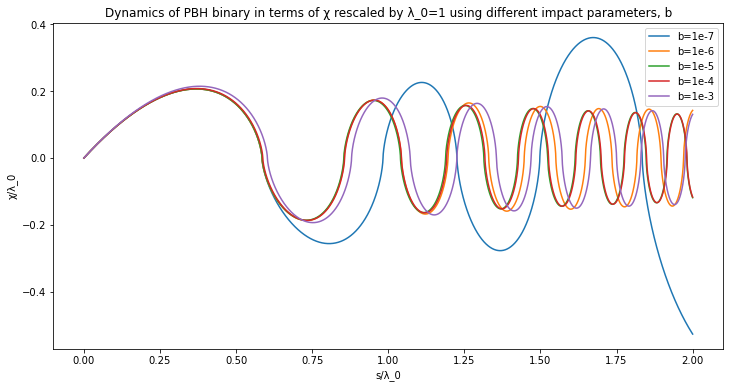

In [12]:
# Numerical solution for the evolution of an equal-mass PBH binary with a time-dependent DM halo. 
# Solution of eq.(20) for different impact parameters in reference  "PBH-binary" pdf.  


fig=plt.figure(figsize=(12,6))

def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))


def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)

b=1e-7    
while b<1e-2:
    def f(u,s):
        return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*
                                                            λ(s)*((u[0]**2+b**2)**(3/2))))]
    λ_0=1
    separation0= [1e-12,1]
    ss= np.linspace(1e-12,2,10000000)  
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_max=np.max(Bs)
    print("b=",'%.1e'%b,"χ/λ_0=",'%.3f'%Bs_max)
    plt.plot(As,Bs,'')
    b*=10
plt.xlabel('s/λ_0')
plt.ylabel('χ/λ_0')  
plt.legend(["b=1e-7","b=1e-6","b=1e-5","b=1e-4","b=1e-3"]) 
plt.title('Dynamics of PBH binary in terms of χ rescaled by λ_0=1 using different impact parameters, b')
plt.savefig("7.jpg",dpi=100)
plt.show()    

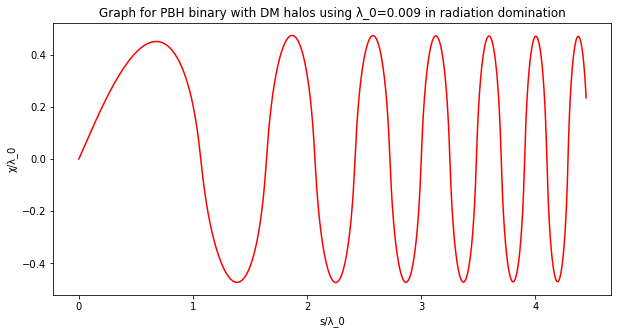

In [20]:
# Numerical solution for the evolution of an equal-mass PBH binary with a time-dependent DM halo in the 
# radiation dominated era. 
# Solution of eq.(32) in reference  "PBH-binary" pdf. 

def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s))

def  k_r(s):
    return (1/n_r(s))

def λ_r(s):
    return λ_0*k_r(s)

def f(u,s):
    return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]
                   #eq.(32) in reference  "PBH-binary" pdf.
λ_0=0.009
b=1e-3
separation0= [1e-12,1]
ss= np.linspace(1e-12,4e-2,1000000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss/λ_0
Bs=separations/λ_0


plt.figure(figsize=(10, 5))

plt.plot(As,Bs,'r')
plt.xlabel('s/λ_0')
plt.ylabel('χ/λ_0')
plt.title('Graph for PBH binary with DM halos using λ_0=0.009 in radiation domination') 
plt.show()


b= 1.0e-07 χ/λ_0= 0.217
b= 1.0e-06 χ/λ_0= 0.207
b= 1.0e-05 χ/λ_0= 0.214
b= 1.0e-04 χ/λ_0= 0.256
b= 1.0e-03 χ/λ_0= 0.473


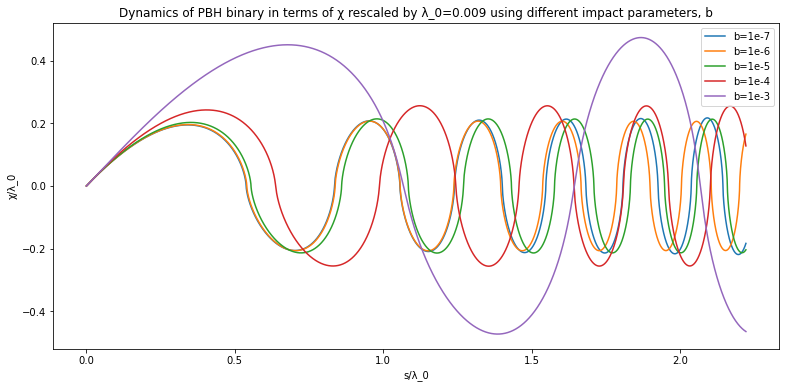

In [21]:
# Numerical solution for the evolution of an equal-mass PBH binary with a time-dependent DM halo in the 
# radiation dominated era. 
# Solution of eq.(32) for different impact parameters in reference  "PBH-binary" pdf. 

fig=plt.figure(figsize=(13,6))
b=1e-7    
while b<1e-2:
    def f(u,s):
        return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ_r(s)*((u[0]**2+b**2)**(3/2))))]
    λ_0=0.009
    separation0= [1e-12,1]
    ss= np.linspace(1e-12,2e-2,1000000) 
    us= odeint(f,separation0,ss)
    separations= us[:,0]
    As=ss/λ_0
    Bs=separations/λ_0
    Bs_max=np.max(Bs)
    print("b=",'%.1e'%b,"χ/λ_0=",'%.3f'%Bs_max)
    b*=10
    plt.plot(As,Bs,'')
plt.xlabel('s/λ_0')
plt.ylabel('χ/λ_0')  
plt.legend(["b=1e-7","b=1e-6","b=1e-5","b=1e-4","b=1e-3"]) 
plt.title('Dynamics of PBH binary in terms of χ rescaled by λ_0=0.009 using different impact parameters, b')
plt.savefig("8.jpg",dpi=100)
plt.show() 

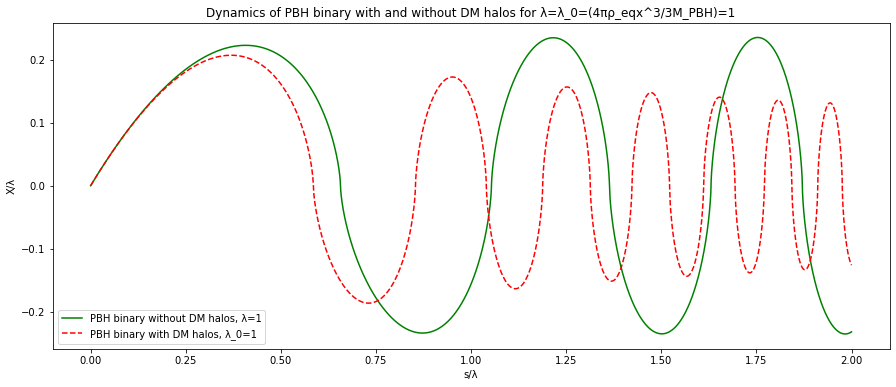

In [13]:
# Comparison of the solution of eq.(6) of Reference research paper "The merger rate of primordial-black-
# hole binaries" for an equal-mass PBH binary having no DM halo ( or solution of eq.(20) in "PBH binary" 
# pdf.) with the solution of eq.(47) for an equal-mass PBH binary having DM halos of same mass.

def h(x):
    return math.sqrt((x**-3)+(x**-4))
def g(x):
        return  -((3*x+4)/(2*h(x)*(x**5)))
    
    

def f(u,s):
    return [u[1], -((s*g(s)+h(s))*((s*u[1]-u[0]))/(h(s)*s**2))-((u[0])/((((h(s)*s)**2))*λ*((u[0]**2+b**2)
                          **(3/2))))] #eq. of binary having equal masses of PBHs without DM halos

λ=1
b=1e-4
separation0= [1e-12,1]
ss= np.linspace(1e-12,2,1000000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss/λ
Bs=separations/λ



def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)
                                                                *math.sqrt(s+1))+(4/3))))

def  k(s):
    return (1/n(s))

def λ(s):
    return λ_0*k(s)


def w(v,t):
    return [v[1], -((t*g(t)+h(t))*((t*v[1]-v[0]))/(h(t)*t**2))-((v[0])/((((h(t)*t)**2))*λ(t)
                     *((v[0]**2+d**2)**(3/2))))] #eq. of binary having equal masses of PBHs with DM halos     
λ_0=1
d= 1e-5
x0= [1e-12,1]
ts= np.linspace(1e-12,2,10000000) 
vs= odeint(w,x0,ts)
xs= vs[:,0]
Ts=ts/λ_0
Xs=xs/λ_0




plt.figure(figsize=(15, 6))


plt.plot(As,Bs,'g')
plt.plot(Ts,Xs,'r--')

plt.xlabel('s/λ')
plt.ylabel('X/λ')  
plt.legend(["PBH binary without DM halos, λ=1","PBH binary with DM halos, λ_0=1"]) 
plt.title('Dynamics of PBH binary with and without DM halos for λ=λ_0=(4πρ_eqx^3/3M_PBH)=1') 
plt.savefig("9.jpg",dpi=100)
plt.show()

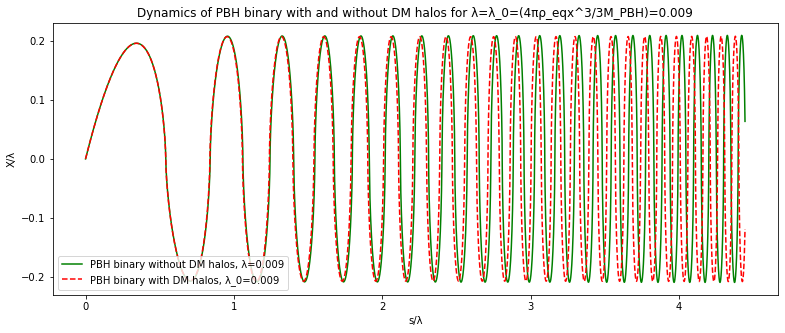

In [23]:
# Comparison of the solution of eq.(9) of Reference research paper "The merger rate of primordial-black-
# hole binaries" for an equal-mass PBH binary having no DM halo ( or solution of eq.(20) in "PBH binary" 
# pdf.) with the solution of eq.(47) for an equal-mass PBH binary having DM halos of same mass 
# in the radiation-dominated era.


def h(x):
    return math.sqrt((x**-3)+(x**-4))
def g(x):
        return  -((3*x+4)/(2*h(x)*(x**5)))
    
    

def f(u,s):
         return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ*((u[0]**2+b**2)**(3/2))))]
              #eq. of binary having equal masses of PBHs without DM halos

λ=0.009
b=1e-6
separation0= [1e-12,1]
ss= np.linspace(1e-12,4e-2,60000) 
us= odeint(f,separation0,ss)
separations= us[:,0]
As=ss/λ
Bs=separations/λ



def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s))

def  k_r(s):
    return (1/n_r(s))

def λ_r(s):
    return λ_0*k_r(s)

def w(v,t):
    return [v[1], ((t*v[1]-v[0])/(t**2))-((v[0]*(t**2))/(λ_r(t)*((v[0]**2+d**2)**(3/2))))] #eq. of binary having equal masses of PBHs with DM halos     
λ_0=0.009
d= 1e-6
x0= [1e-12,1]
ts= np.linspace(1e-12,4e-2,1000000) 
vs= odeint(w,x0,ts)
xs= vs[:,0]
Ts=ts/λ_0
Xs=xs/λ_0




plt.figure(figsize=(13, 5))


plt.plot(As,Bs,'g')
plt.plot(Ts,Xs,'r--')

plt.xlabel('s/λ')
plt.ylabel('X/λ')  
labels = ["PBH binary without DM halos, λ=0.009","PBH binary with DM halos, λ_0=0.009"]
plt.legend(labels,loc="lower left")
plt.title('Dynamics of PBH binary with and without DM halos for λ=λ_0=(4πρ_eqx^3/3M_PBH)=0.009') 
plt.savefig("10.jpg",dpi=100)
plt.show()

λ_1= [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
χ_1_max= [0.00021464 0.0004227  0.00063042 0.0008374  0.00104592 0.0012518
 0.00145872 0.00166955 0.00187699 0.00208481 0.00417662 0.00622866
 0.00830679 0.01038272 0.01269921 0.01458723 0.01698689 0.01913391]


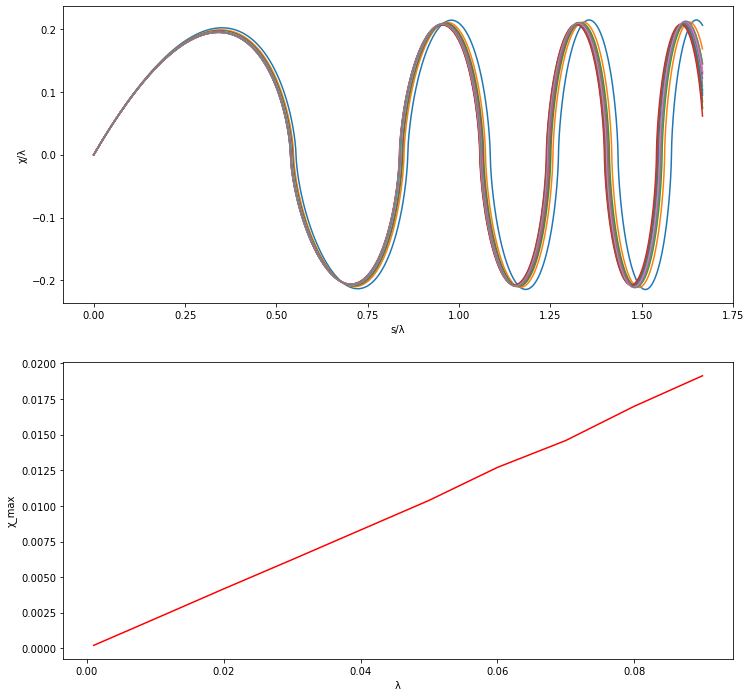

λ_2= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
χ_2_max= [0.25002051 0.44047308 0.58671728 0.84302107 0.88651294 1.14913357]


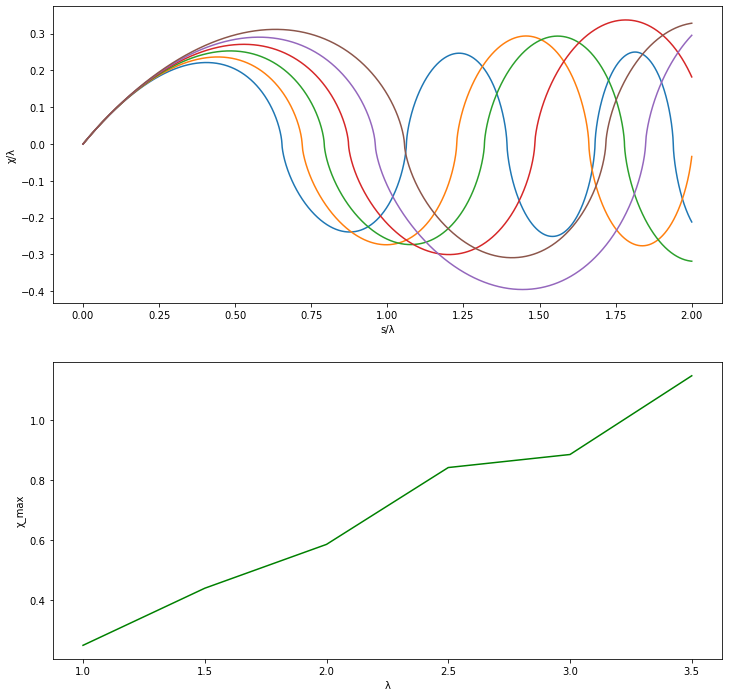

λ_list= [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
χ_max_list= [2.14643083e-04 4.22702166e-04 6.30424326e-04 8.37400719e-04
 1.04591673e-03 1.25180450e-03 1.45872249e-03 1.66955081e-03
 1.87698802e-03 2.08481428e-03 4.17662405e-03 6.22866401e-03
 8.30678787e-03 1.03827242e-02 1.26992072e-02 1.45872343e-02
 1.69868856e-02 1.91339137e-02 2.50020511e-01 4.40473080e-01
 5.86717284e-01 8.43021070e-01 8.86512935e-01 1.14913357e+00]


In [29]:
# Solutions of eqs.(6) and (9) of Reference research paper "The merger rate of primordial-black-
# hole binaries" for finding the values of χ_max using different values of λ.




π=3.14
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kgm^-3
G=6.67e-11            # in units of m^3 kg^-1 s^-2
M_PBH=1e32            # in kg


# eq.(9) of Reference research paper "The merger rate of primordial-black-hole binaries"
fig, ax = plt.subplots(2,figsize=(12, 12))
λ_1_list=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
for λ in λ_1_list:
    def χ_1_max(λ):
        def f(u,s,λ):
            return [u[1], ((s*u[1]-u[0])/(s**2))-((u[0]*(s**2))/(λ*((u[0]**2+b**2)**(3/2))))]
                
        separation0= [1e-12,1]
        b=1e-6
        ss=np.linspace(1e-12,(5*λ/3),100000)  
        us=odeint(f,separation0,ss,args=(λ,))
        separations= us[:,0]
        As=ss/λ
        Bs=separations/λ
        χ_1_max=np.max(separations)
        ax[0].plot(As,Bs,'')
        ax[0].set(xlabel="s/λ", ylabel="χ/λ")
        λ+=0.001
        return  χ_1_max
    
χ_1_max_list = np.zeros(len(λ_1_list))
for i, λ in enumerate(λ_1_list):
     χ_1_max_list[i] = χ_1_max(λ)
print("λ_1=",λ_1_list)
print("χ_1_max=",χ_1_max_list)
ax[1].plot(λ_1_list,χ_1_max_list,'r')
ax[1].set(xlabel="λ", ylabel="χ_max")
plt.show()




# Eq.(6) of Reference research paper "The merger rate of primordial-black-hole binaries"
fig, ax = plt.subplots(2,figsize=(12, 12))
def h(x):
    return math.sqrt((x**-3)+(x**-4))
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
    
    
λ_2_list=[1.0,1.5,2.0,2.5,3.0,3.5]
for λ in λ_2_list:
    def χ_2_max(λ):
        def j(n,p,λ):
            return [n[1], -((p*g(p)+h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*λ
            *((n[0]**2+b**2)**(3/2))))]
        z0= [1e-12,1]
        b=1e-6
        ps= np.linspace(1e-12,(6*λ/3),1000000) 
        ns= odeint(j,z0,ps,args=(λ,))
        zs= ns[:,0]
        Ps=ps/λ
        Zs=zs/λ
        χ_2_max=np.max(zs)
        ax[0].plot(Ps,Zs,'')
        ax[0].set(xlabel="s/λ", ylabel="χ/λ")
        λ+=0.5
        return  χ_2_max
        
χ_2_max_list = np.zeros(len(λ_2_list))
for i, λ in enumerate(λ_2_list):
     χ_2_max_list[i] = χ_2_max(λ)
print("λ_2=",λ_2_list)
print("χ_2_max=",χ_2_max_list)
ax[1].plot(λ_2_list,χ_2_max_list,'g')
ax[1].set(xlabel="λ", ylabel="χ_max")
plt.savefig("11.jpg",dpi=100)
plt.show()



λ_list=λ_1_list+λ_2_list
print("λ_list=",λ_list)

χ_max_list= np.append(χ_1_max_list, χ_2_max_list)
print("χ_max_list=",χ_max_list)

λ_3= [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
χ_3_max= [0.00021444 0.00042206 0.00062838 0.00083472 0.00104178 0.00124597
 0.00145311 0.00165824 0.00186317 0.0020676  0.0041023  0.00613905
 0.00814793 0.01012388 0.01206417 0.01401706 0.01606247 0.01784355]


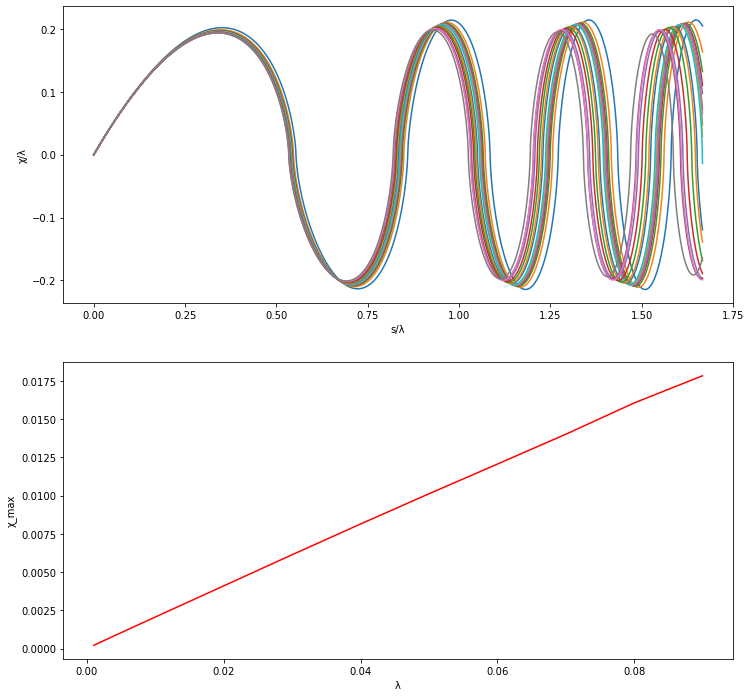

λ_4= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
χ_4_max= [0.20692844 0.31914365 0.4368999  0.55998958 0.688223   0.8214185 ]


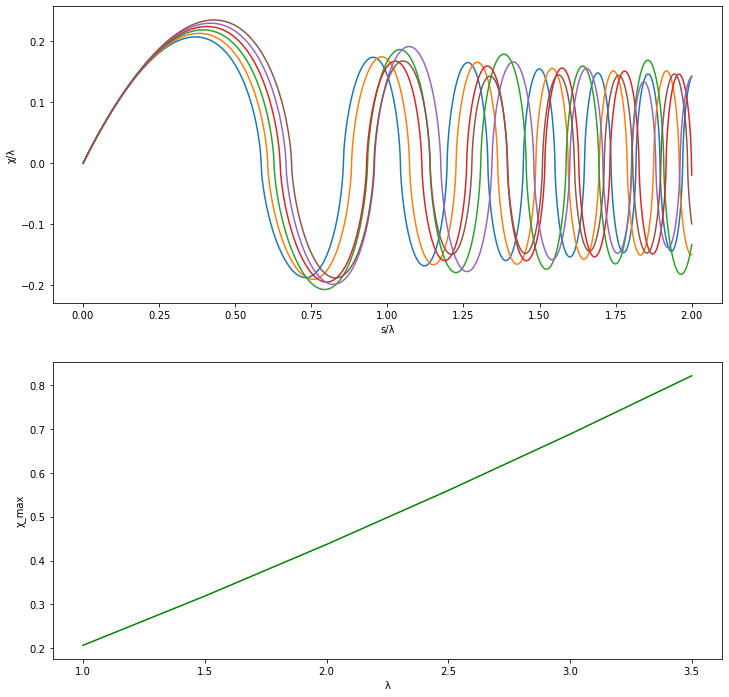

λ_list= [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
χ_max_DM_list= [2.14443215e-04 4.22059300e-04 6.28375551e-04 8.34720725e-04
 1.04177884e-03 1.24596973e-03 1.45310826e-03 1.65824058e-03
 1.86317469e-03 2.06760079e-03 4.10229706e-03 6.13904594e-03
 8.14792746e-03 1.01238763e-02 1.20641674e-02 1.40170636e-02
 1.60624663e-02 1.78435455e-02 2.06928442e-01 3.19143650e-01
 4.36899904e-01 5.59989580e-01 6.88222997e-01 8.21418499e-01]


In [34]:
# Solutions of eqs.(47) and (50) of Reference "PBH binary" pdf for finding the values of χ_max using 
# different values of λ_0.




fig, ax = plt.subplots(2,figsize=(12, 12))

def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s))
def  k_r(s):
    return (1/n_r(s))
def λ_r(s):
    return λ_0*k_r(s)

#Eq.(50) of Reference "PBH binary" pdf. 
λ_3_list=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,
          0.07,0.08,0.09]
for λ_0 in λ_3_list:
    def χ_3_max(λ_0):
        def w(v,t,λ_0):
            return [v[1], ((t*v[1]-v[0])/(t**2))-((v[0]*(t**2))/(λ_r(t)*((v[0]**2+b**2)**(3/2))))] 
        separation0= [1e-12,1]
        b= 1e-6
        x0= [1e-12,1]
        ts= np.linspace(1e-12,((5*λ_0)/3),1000000) 
        vs= odeint(w,x0,ts,args=(λ_0,))
        xs= vs[:,0]
        Ts=ts/λ_0
        Xs=xs/λ_0
        χ_3_max=np.max(xs)
        ax[0].plot(Ts,Xs,'')
        ax[0].set(xlabel="s/λ", ylabel="χ/λ")
        λ_0+=0.001
        return  χ_3_max
    
χ_3_max_list = np.zeros(len(λ_3_list))
for i, λ_0 in enumerate(λ_3_list):
     χ_3_max_list[i] = χ_3_max(λ_0)
print("λ_3=",λ_3_list)
print("χ_3_max=",χ_3_max_list)
ax[1].plot(λ_3_list,χ_3_max_list,'r')
ax[1].set(xlabel="λ", ylabel="χ_max")
plt.show()




#Eq.(47) of Reference "PBH binary" pdf.
fig, ax = plt.subplots(2,figsize=(12, 12))
def h(x):
    return math.sqrt((x**-3)+(x**-4))
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
def  k(s):
    return (1/n(s))

def λ(s):
    return λ_1*k(s)
   
λ_4_list=[1.0,1.5,2.0,2.5,3.0,3.5]
for λ_1 in λ_4_list:
    def χ_4_max(λ_1):
        def j(n,p,λ_1):
            return [n[1], -((p*g(p)+h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*λ(p)
            *((n[0]**2+b**2)**(3/2))))]
        z0= [1e-12,1]
        b= 1e-6
        ps= np.linspace(1e-12,(6*λ_1/3),10000000) 
        ns= odeint(j,z0,ps,args=(λ_1,))
        zs= ns[:,0]
        Ps=ps/λ_1
        Zs=zs/λ_1
        χ_4_max=np.max(zs)
        ax[0].plot(Ps,Zs,'')
        ax[0].set(xlabel="s/λ", ylabel="χ/λ")
        λ_1+=0.5
        return  χ_4_max
        
χ_4_max_list = np.zeros(len(λ_4_list))
for i, λ_1 in enumerate(λ_4_list):
     χ_4_max_list[i] = χ_4_max(λ_1)
print("λ_4=",λ_4_list)
print("χ_4_max=",χ_4_max_list)
ax[1].plot(λ_4_list,χ_4_max_list,'g')
ax[1].set(xlabel="λ", ylabel="χ_max")
plt.show()

λ_list=λ_3_list+λ_4_list
print("λ_list=",λ_list)
χ_max_DM_list= np.append(χ_3_max_list, χ_4_max_list)
print("χ_max_DM_list=", χ_max_DM_list)


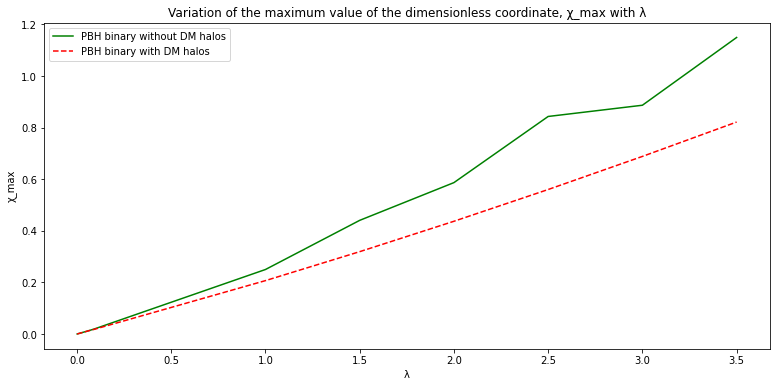

In [35]:
# Variation of the maximum value of the dimensionless coordinate,χ_max with rescaling factors,λ
# for equal-mass PBH binary without DM halos and equal-mass PBH binary with DM halos.

# λ = rescaling factor

# χ_max_DM_list = maximum value of the dimensionless coordinate, χ for the PBH binaries having PBHs of 
# same mass, M_PBH having equally massive DM halos being accreted around them. 

# χ_max_list = maximum value of the dimensionless coordinate, χ for the PBH binaries having PBHs of same 
# mass, M_PBH without having DM halos. 


plt.figure(figsize=(13,6))              
plt.plot(λ_list,χ_max_list,'g')
plt.plot(λ_list,χ_max_DM_list,'r--')      
plt.legend(["PBH binary without DM halos","PBH binary with DM halos"])
plt.xlabel('λ')          
plt.ylabel('χ_max')       
plt.title('Variation of the maximum value of the dimensionless coordinate, χ_max with λ')
plt.savefig("11.jpg",dpi=100)
plt.show()

λ_0= [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
s= [1.64898332e-06 6.51533318e-06 1.19887770e-05 2.12533813e-05
 3.31567832e-05 4.76501277e-05 6.48112215e-05 8.45586979e-05
 1.06918622e-04 1.31848299e-04 3.79340379e-04 8.51232851e-04
 1.50799617e-03 2.34918568e-03 3.36839737e-03 4.57476707e-03
 5.96851797e-03 7.51877852e-03]
Mass of the DM halos at the point of PBH binary decouple =  [1.13827081e+26 4.49744610e+26 8.27569009e+26 1.46709207e+27
 2.28876775e+27 3.28922366e+27 4.47383068e+27 5.83697219e+27
 7.38044741e+27 9.10130916e+27 2.61853517e+28 5.87594488e+28
 1.04094930e+29 1.62161100e+29 2.32515900e+29 3.15789964e+29
 4.11998697e+29 5.19011080e+29]  in kg
M_DM at the point of PBH binary decouple using λ_0 = 0.009  is = 7.380447411619842e+27 kg


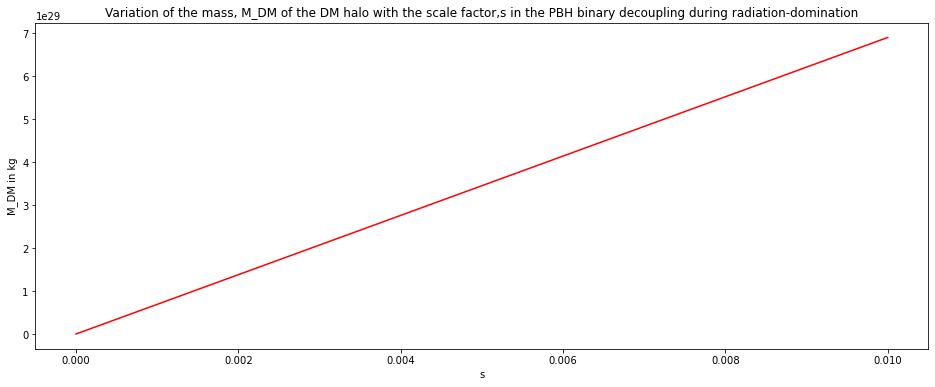

In [85]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping in the radiation dominated era using eqs.(43) & (50) in reference pdf "PBH binary".

def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s))
def  k_r(s):
    return (1/n_r(s))
def λ_r(s):
    return λ_0*k_r(s)



λ_3_list=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,
          0.07,0.08,0.09]
for λ_0 in λ_3_list:
    def s_max(λ_0):
        def w(v,t,λ_0):
            return [v[1], ((t*v[1]-v[0])/(t**2))-((v[0]*(t**2))/(λ_r(t)*((v[0]**2+b**2)**(3/2))))] 
        separation0= [1e-12,1]
        b= 1e-6
        x0= [1e-12,1]
        ts= np.linspace(1e-12,((5*λ_0)/3),1000000) 
        vs= odeint(w,x0,ts,args=(λ_0,))
        xs= vs[:,0]
        Ts=ts/λ_0
        Xs=xs/λ_0
        χ_max=np.max(Xs)
        s_max = ts[np.argmax(Xs)]
        λ_0+=0.001
        return  s_max
    
s_max_list=np.zeros(len(λ_3_list))

for i, λ_0 in enumerate(λ_3_list):
     s_max_list[i] = (λ_0* s_max(λ_0))
print("λ_0=",λ_3_list)
print("s=",s_max_list)


def M_r(s):
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)
M_r_list=np.zeros(len(s_max_list)) 
for i, s in enumerate(s_max_list):
     M_r_list[i] = M_r(s)
print("Mass of the DM halos at the point of PBH binary decouple = ", M_r_list," in kg")

M2_r = np.vectorize(M_r) 
s=np.linspace(1e-12,1e-2,100000)

print("M_DM at the point of PBH binary decouple using λ_0 = 0.009  is =",M2(1.06918622e-04),"kg")
# using s[8] = 1.06918622e-04 corresponding to λ_0=0.009.(just picked the value of λ_0 keep analogy with the
# reference research paper "The merger rate of primordial-black-hole binaries".)

plt.figure(figsize=(16,6))
plt.plot(s, M2_r(s),'r')
plt.xlabel('s')
plt.ylabel('M_DM in kg')
plt.title('Variation of the mass, M_DM of the DM halo with the scale factor,s in the PBH binary decoupling during radiation-domination')
plt.show()       

λ_0= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
s= [0.36908424 0.85989114 1.57926016 2.543984   3.76984478 5.27171453]
Mass of the DM halos at the point of PBH binary decouple =  [2.41370248e+31 5.31800968e+31 9.17254886e+31 1.38610147e+32
 1.93039049e+32 2.54483718e+32]  in kg
M_DM at the point of PBH binary decouple using λ_0 = 1  is = 2.4137024997842876e+31 kg


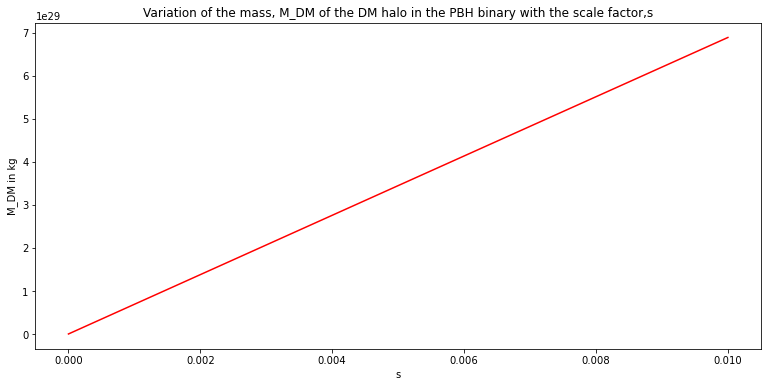

In [70]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping later around matter-radiation equality using eqs.(42) & (47) in reference 
# pdf "PBH binary" .



plt.figure(figsize=(13,6))


def h(x):
    return math.sqrt((x**-3)+(x**-4))
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
def  k(s):
    return (1/n(s))

def λ(s):
    return λ_1*k(s)
   
λ_4_list=[1.0,1.5,2.0,2.5,3.0,3.5]
for λ_1 in λ_4_list:
    def s_max(λ_1):
        def j(n,p,λ_1):
            return [n[1], -((p*g(p)+h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*λ(p)
            *((n[0]**2+b**2)**(3/2))))]
        z0= [1e-12,1]
        b= 1e-6
        ps= np.linspace(1e-12,(6*λ_1/3),10000000) 
        ns= odeint(j,z0,ps,args=(λ_1,))
        zs= ns[:,0]
        Ps=ps/λ_1
        Zs=zs/λ_1
        χ_max=np.max(Zs)
        s_max = ps[np.argmax(Zs)]
        λ_1+=0.5
        return  s_max
        
s_max_list=np.zeros(len(λ_4_list))

for i, λ_1 in enumerate(λ_4_list):
     s_max_list[i] = (λ_1* s_max(λ_1))
print("λ_0=",λ_4_list)
print("s=",s_max_list)

def M(s):
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))
                                                                          +(4/3)))
M_list=np.zeros(len(s_max_list)) 
for i, s in enumerate(s_max_list):
     M_list[i] = M(s)
print("Mass of the DM halos at the point of PBH binary decouple = ", M_list," in kg")

M2 = np.vectorize(M) 
s=np.linspace(1e-12,1e-2,100000)
print("M_DM at the point of PBH binary decouple using λ_0 = 1  is =",M2(0.36908424),"kg") 
# using s[0] =0.36908424 corresponding to λ_0=1.
plt.plot(s, M2(s),'r')
plt.xlabel('s')
plt.ylabel('M_DM in kg')
plt.title('Variation of the mass, M_DM of the DM halo in the PBH binary with the scale factor,s')
plt.show()       

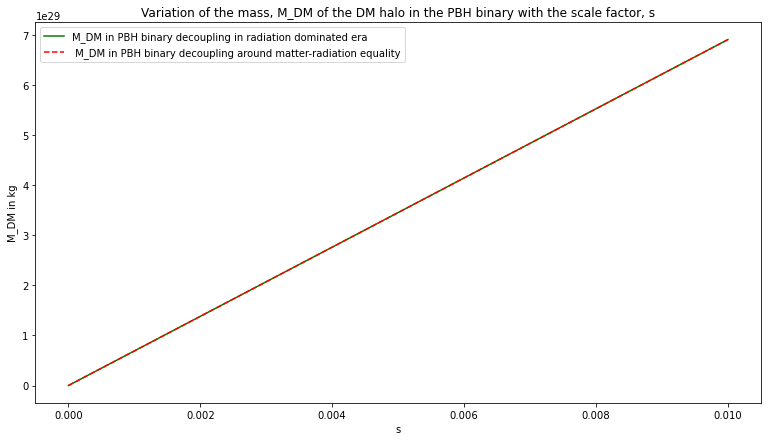

In [86]:
# Comparison of the mass, M_DM of the DM halos in equal mass PBH binary decoulping in radiation domination
# with mass, M_DM of the DM halos in equal mass PBH binary decoupling around matter-radiation equality.
 
plt.figure(figsize=(13,7))
plt.plot(s, M2_r(s),'g')
plt.plot(s, M2(s),'r--')
plt.xlabel('s')
plt.ylabel('M_DM in kg')
plt.title('Variation of the mass, M_DM of the DM halo in the PBH binary with the scale factor, s')
plt.legend(["M_DM in PBH binary decoupling in radiation dominated era"," M_DM in PBH binary decoupling around matter-radiation equality"])
plt.show()